In [185]:
# import the packages we need to investigate the data
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from calendar import monthrange
import matplotlib.dates as mdates
import scipy.stats as st
import requests
from meteostat import Point, Daily

Import the data from train.csv

In [207]:
# Read the CSV file into a DataFrame
df = pd.read_csv('train.csv')

print(df.head())  # Display the first few rows of the DataFrame



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [173]:
df.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
dtype: object

In [174]:
df.min()

PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                           0.0
dtype: object

In [187]:
# separate the dataframe by the death and survival
death_df = df[df["Survived"]== 0]
live_df = df[df["Survived"]== 1]
death_total = len(death_df)
live_total = len(live_df)


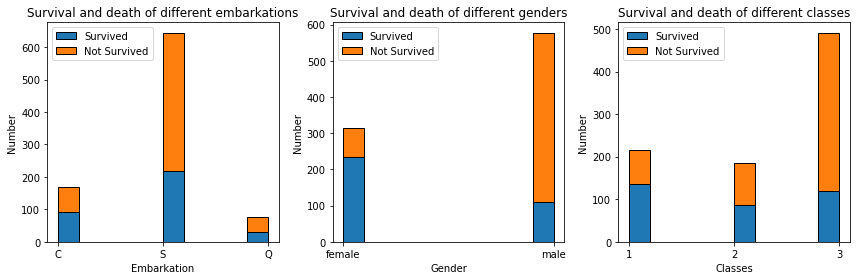

In [208]:

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Embarkation
filtered_live_df = live_df.dropna(subset=['Embarked'])
filtered_death_df = death_df.dropna(subset=['Embarked'])
axes[0].hist([filtered_live_df['Embarked'], filtered_death_df['Embarked']], stacked=True, density=False, edgecolor='black')
axes[0].set_title('Survival and death of different embarkations')
axes[0].set_ylabel('Number')
axes[0].set_xlabel('Embarkation')
axes[0].legend(['Survived', 'Not Survived'])

# Plot 2: Gender
axes[1].hist([live_df['Sex'], death_df['Sex']], stacked=True, density=False, edgecolor='black')
axes[1].set_title('Survival and death of different genders')
axes[1].set_ylabel('Number')
axes[1].set_xlabel('Gender')
axes[1].legend(['Survived', 'Not Survived'])

# Plot 3: Pclass
axes[2].hist([live_df['Pclass'], death_df['Pclass']], stacked=True, density=False, edgecolor='black')
axes[2].set_title('Survival and death of different classes')
axes[2].set_ylabel('Number')
axes[2].set_xlabel('Classes')
axes[2].legend(['Survived', 'Not Survived'])
axes[2].set_xticks(range(1, 4))
axes[2].set_xticklabels(['1', '2', '3'])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


We use scatterplot to investigate the relationship between passengerID and survival rate

In [209]:

# Create the scatter plot
live_df['PassengerId'].mean()
death_df['PassengerId'].mean()
df['PassengerId'].mean()


446.0

The mean value of passengerID of survivied is 444, and the mean value of passengerID of dead is 447.

The mean value of passengerID of total passengers is 446.

So it can be concluded that the ID has little impact on the survival rate.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

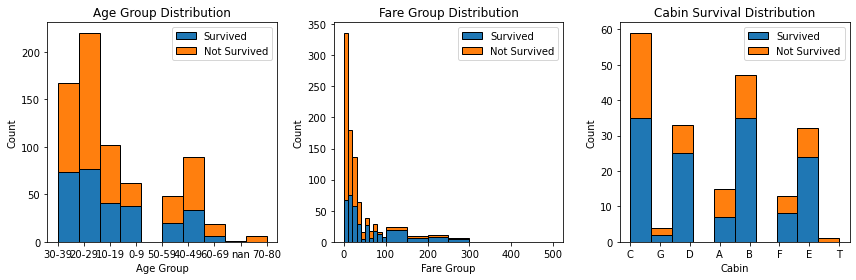

In [211]:

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Age Group Distribution
filtered_live_df = live_df.dropna(subset=['Age'])
filtered_death_df = death_df.dropna(subset=['Age'])

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-80']

# Segment people by age
filtered_live_df['Age Group'] = pd.cut(filtered_live_df['Age'], bins=bins, labels=labels, right=False)
filtered_death_df['Age Group'] = pd.cut(filtered_death_df['Age'], bins=bins, labels=labels, right=False)

filtered_live_df['Age Group'] = filtered_live_df['Age Group'].astype(str)
filtered_death_df['Age Group'] = filtered_death_df['Age Group'].astype(str)



axes[0].hist([filtered_live_df['Age Group'], filtered_death_df['Age Group']], stacked=True, density=False, edgecolor='black')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].set_title('Age Group Distribution')
axes[0].legend(['Survived', 'Not Survived'])

# Plot 2: Fare Group Distribution
filtered_live_df = live_df.dropna(subset=['Fare'])
filtered_death_df = death_df.dropna(subset=['Fare'])

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500+']

axes[1].hist([filtered_live_df['Fare'], filtered_death_df['Fare']], bins=bins, stacked=True, density=False, edgecolor='black')
axes[1].set_xlabel('Fare Group')
axes[1].set_ylabel('Count')
axes[1].set_title('Fare Group Distribution')
axes[1].legend(['Survived', 'Not Survived'])

# Plot 3: Cabin Survival Distribution
filtered_live_df = live_df.dropna(subset=['Cabin'])
filtered_death_df = death_df.dropna(subset=['Cabin'])

filtered_live_df['Initial'] = filtered_live_df['Cabin'].apply(lambda x: x[0])
filtered_death_df['Initial'] = filtered_death_df['Cabin'].apply(lambda x: x[0])

axes[2].hist([filtered_live_df['Initial'], filtered_death_df['Initial']], stacked=True, density=False, edgecolor='black')
axes[2].set_xlabel('Cabin')
axes[2].set_ylabel('Count')
axes[2].set_title('Cabin Survival Distribution')
axes[2].legend(['Survived', 'Not Survived'])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


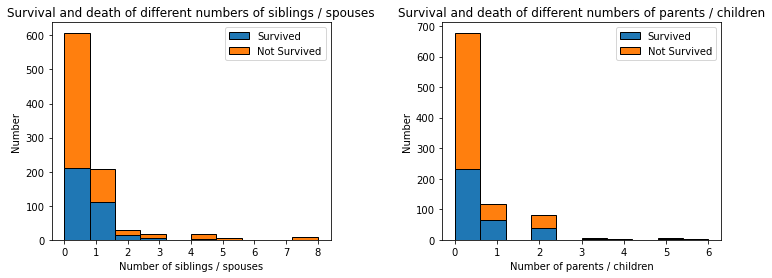

In [215]:

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Number of Siblings / Spouses
axes[0].hist([live_df['SibSp'], death_df['SibSp']], stacked=True, density=False, edgecolor='black')
axes[0].set_title('Survival and death of different numbers of siblings / spouses')
axes[0].set_ylabel('Number')
axes[0].set_xlabel('Number of siblings / spouses')
axes[0].legend(['Survived', 'Not Survived'])

# Plot 2: Number of Parents / Children
axes[1].hist([live_df['Parch'], death_df['Parch']], stacked=True, density=False, edgecolor='black')
axes[1].set_title('Survival and death of different numbers of parents / children')
axes[1].set_ylabel('Number')
axes[1].set_xlabel('Number of parents / children')
axes[1].legend(['Survived', 'Not Survived'])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plot
plt.show()



## Sample Investigation

In [234]:
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', False)
seed= 92

In [235]:
train= pd.read_csv('train.csv')
print(f"Shape of train:    {train.shape}")
print('#TRAIN INFO:')
print(train.info(),'\n')

Shape of train:    (891, 12)
#TRAIN INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 



In [236]:
print(F"Number of duplicates in PassengerId column = {len(train)-len(pd.unique(train['PassengerId']))}")

Number of duplicates in PassengerId column = 0


### Survived:
The label column, with a datatype of int64, it has two values: 0 represents passengers who did not survive, and 1 represents those who did. Among the 891 passengers in the training set, 61.6% survived and 38.4% did not.

In [237]:
print("Value count")
print(train['Survived'].value_counts())
print("\nRatio")
print(train['Survived'].value_counts(normalize= True))

Value count
0    549
1    342
Name: Survived, dtype: int64

Ratio
0    0.616162
1    0.383838
Name: Survived, dtype: float64


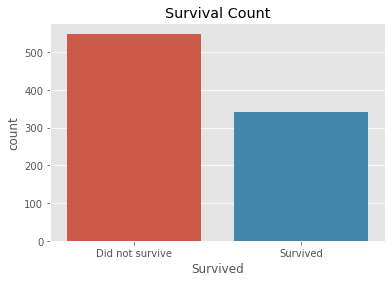

In [240]:


sns.countplot(data=train, x='Survived')
plt.xticks(ticks=[0, 1], labels=['Did not survive', 'Survived'])
plt.title("Survival Count")

plt.show()

### Pclass:
Refers to Passenger class with a datatype of int64, where 1 represents 1st class, 2 represents 2nd class, and 3 represents 3rd class. It is notable that the survival percentage in the 1st class is the highest.

In [241]:
pclass_pivot = train.pivot_table(index='Pclass', columns='Survived', values='PassengerId', aggfunc='count')
pclass_pivot.columns = ['No', 'Yes']
pclass_pivot['Total'] = pclass_pivot['Yes'] + pclass_pivot['No']
pclass_pivot['Survival %'] = round(pclass_pivot['Yes'] / (pclass_pivot['Yes'] + pclass_pivot['No']) * 100,1).astype(str) + '%'
pclass_pivot

,No,Yes,Total,Survival %
Pclass,,,,
1,80,136,216,63.0%
2,97,87,184,47.3%
3,372,119,491,24.2%


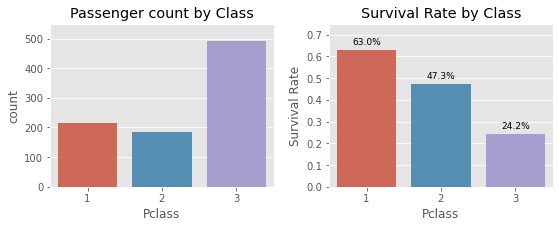

In [243]:
fig= plt.figure(figsize=(9,3))

ax1= plt.subplot(1,2,1)
sns.countplot(x="Pclass", data=train,  alpha= 0.9, ax=ax1)
ax1.set_title("Passenger count by Class")
ax1.set_ylim([0, 550])


ax2= plt.subplot(1,2,2)
pclass_survival_rate = train.groupby('Pclass')['Survived'].mean().reset_index()
sns.barplot(x='Pclass', y='Survived', data=pclass_survival_rate,  alpha= 0.9, ax= ax2)
ax2.set_title('Survival Rate by Class')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Survival Rate')
ax2.set_ylim([0, 0.75])
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.subplots_adjust(wspace=0.25)
plt.show()